In [ ]:
# Install dependencies
!pip install keras-facenet mtcnn opencv-python-headless matplotlib

# Imports
from keras_facenet import FaceNet
from mtcnn import MTCNN
import cv2
import numpy as np
import matplotlib.pyplot as plt


  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 46.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 28.4 MB/s eta 0:00:00
  Created wheel for keras-facenet: filename=keras_facenet-0.3.2-py3-none-any.whl size=10367 sha256=ae351d1eeebc20307356787e21a7c6c2f053dc8d40a5a93d2daa6242fb70515e
  Stored in directory: /root/.cache/pip/wheels/05/b0/f5/19ac49fedc10b1df3ee56b096edbcfa39d45794fccc6bcdbbf
Successfully built keras-facenet


In [ ]:
embedder = FaceNet()   # Pretrained FaceNet model
detector = MTCNN()     # Face detector


In [ ]:
'''
def get_face_embedding(img_path):
    # Read image
    img = cv2.imread(img_path)
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    # Detect face
    results = detector.detect_faces(img_rgb)
    if len(results) == 0:
        print("No face detected in:", img_path)
        return None

    x, y, w, h = results[0]['box']
    face = img_rgb[y:y+h, x:x+w]

    # Get embedding
    embedding = embedder.embeddings([face])[0]
    return embedding, img_rgb, (x, y, w, h)
     '''


' \ndef get_face_embedding(img_path):\n    # Read image\n    img = cv2.imread(img_path)\n    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)\n\n    # Detect face\n    results = detector.detect_faces(img_rgb)\n    if len(results) == 0:\n        print("No face detected in:", img_path)\n        return None\n\n    x, y, w, h = results[0][\'box\']\n    face = img_rgb[y:y+h, x:x+w]\n\n    # Get embedding\n    embedding = embedder.embeddings([face])[0]\n    return embedding, img_rgb, (x, y, w, h)\n     '

In [ ]:
'''
 from numpy.linalg import norm

def compare_faces(img1_path, img2_path, threshold=10):
    emb1, img1, box1 = get_face_embedding(img1_path)
    emb2, img2, box2 = get_face_embedding(img2_path)

    if emb1 is None or emb2 is None:
        return "Face not detected in one of the images"

    # Calculate L2 distance
    distance = norm(emb1 - emb2)
    print("Distance:", distance)

    if distance < threshold:
        return "✅ Same person"
    else:
        return "❌ Different persons"
  '''


'\n from numpy.linalg import norm\n\ndef compare_faces(img1_path, img2_path, threshold=10):\n    emb1, img1, box1 = get_face_embedding(img1_path)\n    emb2, img2, box2 = get_face_embedding(img2_path)\n\n    if emb1 is None or emb2 is None:\n        return "Face not detected in one of the images"\n\n    # Calculate L2 distance\n    distance = norm(emb1 - emb2)\n    print("Distance:", distance)\n\n    if distance < threshold:\n        return "✅ Same person"\n    else:\n        return "❌ Different persons"   \n  '

In [ ]:
'''
result = compare_faces("modi2.jpg", "trrump.jpg")
print(result)
'''

' result = compare_faces("modi2.jpg", "trrump.jpg")\nprint(result)\n'

In [ ]:
from numpy.linalg import norm

def l2_normalize(x):
    return x / np.sqrt(np.sum(np.multiply(x, x)))

def get_face_embedding(img_path):
    img = cv2.imread(img_path)
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    results = detector.detect_faces(img_rgb)
    if len(results) == 0:
        print("No face detected in:", img_path)
        return None

    x, y, w, h = results[0]['box']
    face = img_rgb[y:y+h, x:x+w]

    # Get embedding
    embedding = embedder.embeddings([face])[0]
    embedding = l2_normalize(embedding)   # ✅ normalize
    return embedding


In [ ]:
def compare_faces(img1_path, img2_path, threshold=0.9):  # ✅ smaller threshold
    emb1 = get_face_embedding(img1_path)
    emb2 = get_face_embedding(img2_path)

    if emb1 is None or emb2 is None:
        return "Face not detected in one of the images"

    distance = norm(emb1 - emb2)
    print("Distance:", distance)

    if distance < threshold:
        return "✅ Same person"
    else:
        return "❌ Different persons"


In [ ]:
result = compare_faces("modi2.jpg", "trrump.jpg")
print(result)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 126ms/step
Distance: 1.4190712
❌ Different persons


In [ ]:
result = compare_faces("modi2.jpg", "modi1.jpg")
print(result)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step
Distance: 0.4224423
✅ Same person


In [ ]:
result = compare_faces("trump2.jpg", "trrump.jpg")
print(result)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step
Distance: 0.90554714
❌ Different persons


In [ ]:
result = compare_faces("nirmala.jpg", "nirmala_young.jpg")
print(result)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step
Distance: 0.6614533
✅ Same person


In [ ]:
result = compare_faces("modi2.jpg", "nirmala.jpg")
print(result)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 441ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 213ms/step
Distance: 1.2497727
❌ Different persons


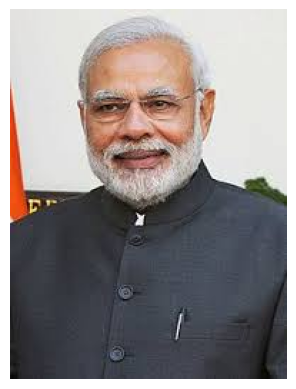

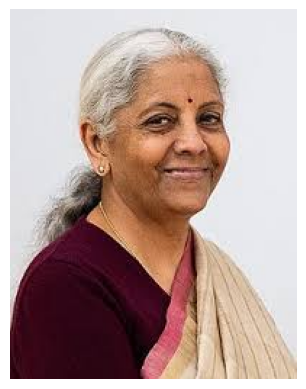

In [ ]:
def show_image(img_path):
    img = cv2.imread(img_path)
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.imshow(img_rgb)
    plt.axis("off")
    plt.show()

show_image("modi2.jpg")
show_image("nirmala.jpg")
